# Problem 1

## (a)

In [2]:
library("mcsm")
data(challenger)
fit.logistic<-glm(oring ~ temp, data=challenger, family=binomial(link="logit"))
fit.logistic
summary(fit.logistic)




Call:  glm(formula = oring ~ temp, family = binomial(link = "logit"), 
    data = challenger)

Coefficients:
(Intercept)         temp  
    15.0429      -0.2322  

Degrees of Freedom: 22 Total (i.e. Null);  21 Residual
Null Deviance:	    28.27 
Residual Deviance: 20.32 	AIC: 24.32


Call:
glm(formula = oring ~ temp, family = binomial(link = "logit"), 
    data = challenger)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0611  -0.7613  -0.3783   0.4524   2.2175  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  15.0429     7.3786   2.039   0.0415 *
temp         -0.2322     0.1082  -2.145   0.0320 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 28.267  on 22  degrees of freedom
Residual deviance: 20.315  on 21  degrees of freedom
AIC: 24.315

Number of Fisher Scoring iterations: 5


From the above, we get the MLE values of $\alpha$ and $\beta$. In specific, we have:
$$\hat{\alpha}_{MLE} = 15.0429, \\ \hat{\beta}_{MLE} = -0.2322$$.

The we have that the 95% confidence intervals are:

\begin{align}
    I_{\alpha} &= [\hat{\alpha}_{MLE}-1.96\cdot7.3786, \hat{\alpha}_{MLE}+1.96\cdot7.3786] \\
    &= [0.58,29.505]\\
    I_{\beta} &= [\hat{\beta}_{MLE}-1.96\cdot 0.1082, \hat{\beta}_{MLE}+1.96\cdot 0.1082] \\
    &= [-0.444,-0.02]
\end{align}

## (b)

In [3]:
set.seed(1)
Nsim=10^4
x=challenger$temp
y=challenger$oring
sigmaa=5 ; sigmab=5/sd(x)
lpost=function(a,b){sum(y*(a+b*x)-log(1+exp(a+b*x)))+
                    dnorm(a,sd=sigmaa,log=TRUE)+dnorm(b,sd=sigmab,log=TRUE)}
# Initialize a and b to equal the MLEs
beta=as.vector(fit.logistic$coefficients)
a=b=rep(0,Nsim)
a[1]=beta[1]
b[1]=beta[2]
#As scale for the proposal densities consider the square root of the
# cov.unscaled from the ml fit to the logistic model
fit.logistic.summary<-summary(fit.logistic)
scala=sqrt(fit.logistic.summary$cov.unscaled[1,1])
scalb=sqrt(fit.logistic.summary$cov.unscaled[2,2])
for (t in 2:Nsim){
    propa=a[t-1]+sample(c(-1,1),1)*rexp(1)*scala
    if (log(runif(1))<lpost(propa,b[t-1])- lpost(a[t-1],b[t-1])) 
        a[t]=propa else
            a[t]=a[t-1]
        propb=b[t-1]+sample(c(-1,1),1)*rexp(1)*scalb
    if (log(runif(1))<lpost(a[t],propb)- lpost(a[t],b[t-1]))
        b[t]=propb
    else b[t]=b[t-1]
}

In [4]:
print(length(unique(a))/Nsim)
print(length(unique(b))/Nsim)

[1] 0.1001
[1] 0.0987


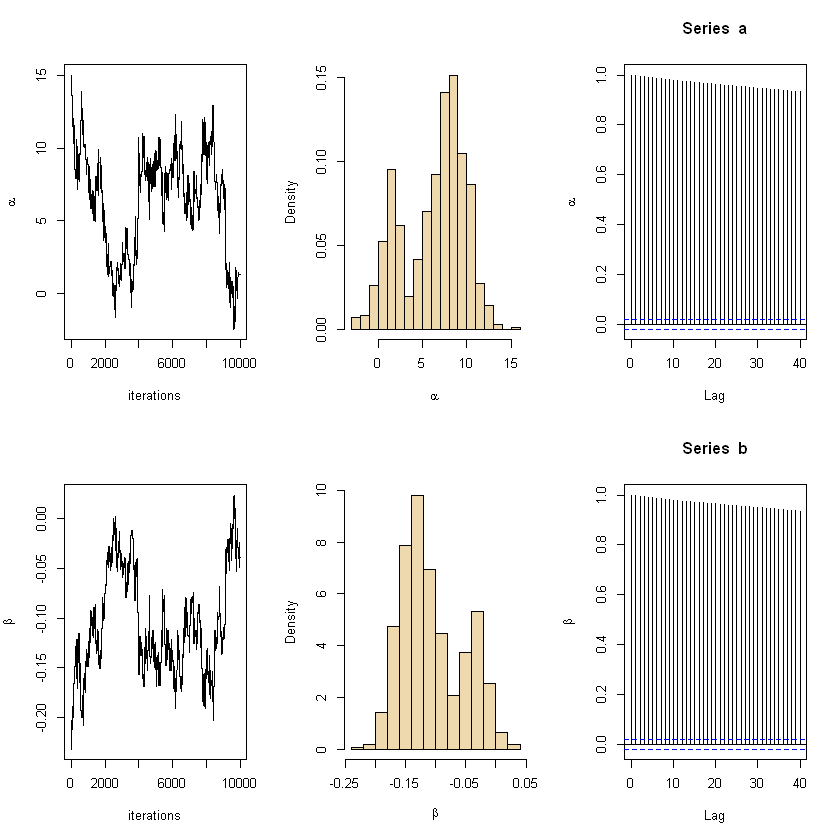

In [5]:
par(mfrow=c(2,3))
plot(a,type="l",xlab="iterations",ylab=expression(alpha))
hist(a,prob=TRUE,col="wheat2",xlab=expression(alpha),main="")
acf(a,ylab=expression(alpha))
plot(b,type="l",xlab="iterations",ylab=expression(beta))
hist(b,prob=TRUE,col="wheat2",xlab=expression(beta),main="")
acf(b,ylab=expression(beta))


In [6]:
print (c(mean(a), sd(a))); print (c(mean(b), sd(b)))

[1] 6.294067 3.497769
[1] -0.10533114  0.05123078


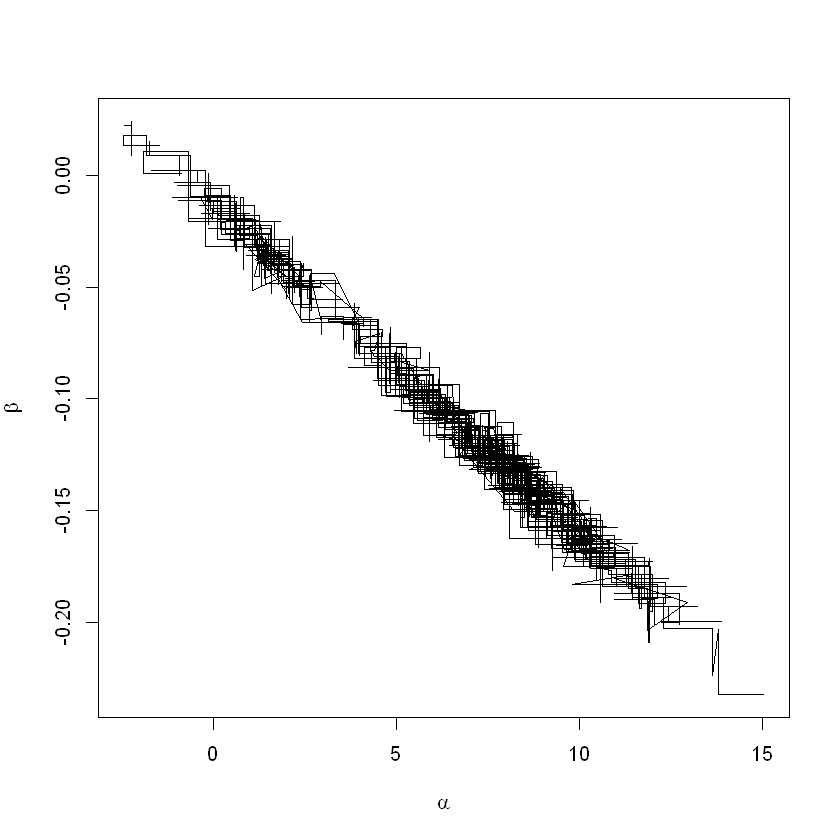

In [7]:
par(mfcol=c(1,1))
plot(a,b,type="l",xlab=expression(alpha),ylab=expression(beta))


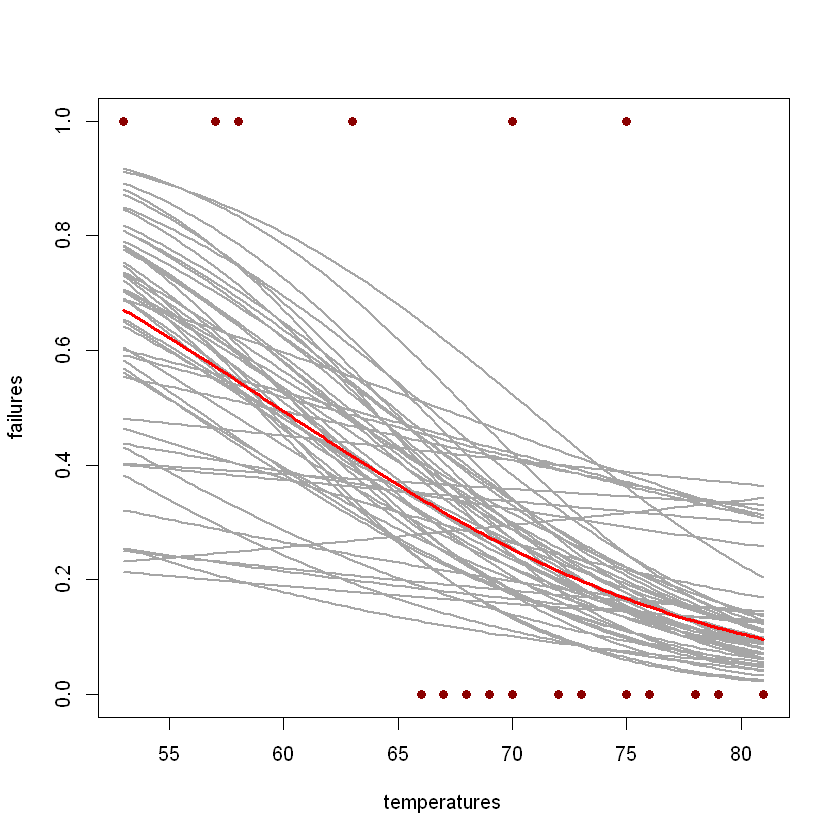

In [8]:
plot(challenger$temp,challenger$oring,pch=19,col="red4",xlab="temperatures",ylab="failures")
for (t in seq(1000,Nsim,le=50)) curve(1/(1+exp(-a[t]-b[t]*x)), add=TRUE,col="grey65",lwd=2)
curve(1/(1+exp(-mean(a)-mean(b)*x)),add=TRUE,col="red",lwd=2.5)
postal=rep(0,1000);i=1


In [9]:
for (x0 in c(60,50,40,30)){
print(c(x0, mean(1/(1+exp(-a-b*x0))),
sd(1/(1+exp(-a-b*x0)))))
}

[1] 60.0000000  0.4944781  0.1431809
[1] 50.0000000  0.7012076  0.1959169
[1] 40.0000000  0.8134438  0.2077082
[1] 30.0000000  0.8673593  0.1983737


## (c)

We want a variance of 100 the previous one, thus we multiply the standard deviation $\sigma$ by 10.

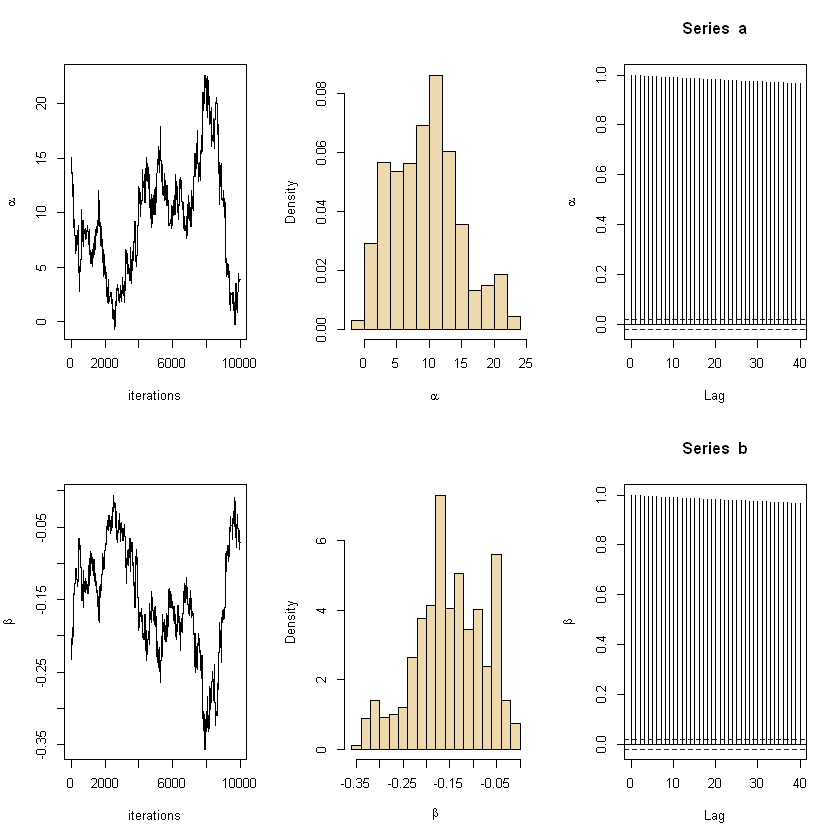

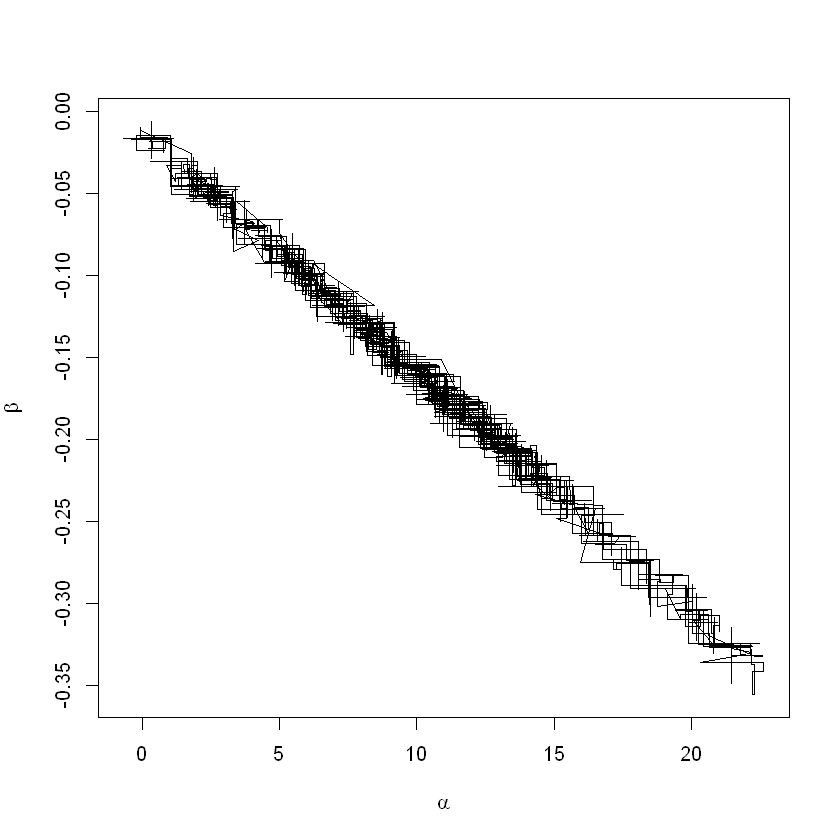

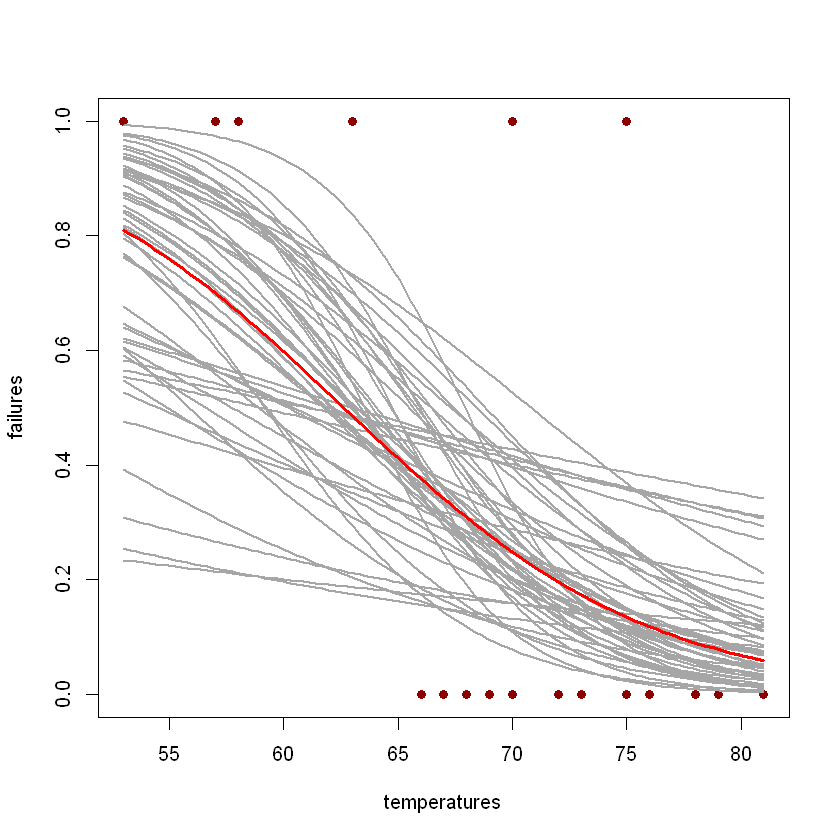

In [10]:
set.seed(1)
Nsim=10^4
x=challenger$temp
y=challenger$oring
sigmaa=5*10 ; sigmab=5*10/sd(x)
lpost=function(a,b){sum(y*(a+b*x)-log(1+exp(a+b*x)))+
                    dnorm(a,sd=sigmaa,log=TRUE)+dnorm(b,sd=sigmab,log=TRUE)}
# Initialize a and b to equal the MLEs
beta=as.vector(fit.logistic$coefficients)
a=b=rep(0,Nsim)
a[1]=beta[1]
b[1]=beta[2]
#As scale for the proposal densities consider the square root of the
# cov.unscaled from the ml fit to the logistic model
fit.logistic.summary<-summary(fit.logistic)
scala=sqrt(fit.logistic.summary$cov.unscaled[1,1])
scalb=sqrt(fit.logistic.summary$cov.unscaled[2,2])
for (t in 2:Nsim){
    propa=a[t-1]+sample(c(-1,1),1)*rexp(1)*scala
    if (log(runif(1))<lpost(propa,b[t-1])- lpost(a[t-1],b[t-1])) 
        a[t]=propa else
            a[t]=a[t-1]
        propb=b[t-1]+sample(c(-1,1),1)*rexp(1)*scalb
    if (log(runif(1))<lpost(a[t],propb)- lpost(a[t],b[t-1]))
        b[t]=propb
    else b[t]=b[t-1]
}



par(mfrow=c(2,3))
plot(a,type="l",xlab="iterations",ylab=expression(alpha))
hist(a,prob=TRUE,col="wheat2",xlab=expression(alpha),main="")
acf(a,ylab=expression(alpha))
plot(b,type="l",xlab="iterations",ylab=expression(beta))
hist(b,prob=TRUE,col="wheat2",xlab=expression(beta),main="")
acf(b,ylab=expression(beta))

par(mfcol=c(1,1))
plot(a,b,type="l",xlab=expression(alpha),ylab=expression(beta))

plot(challenger$temp,challenger$oring,pch=19,col="red4",xlab="temperatures",ylab="failures")
for (t in seq(1000,Nsim,le=50)) curve(1/(1+exp(-a[t]-b[t]*x)), add=TRUE,col="grey65",lwd=2)
curve(1/(1+exp(-mean(a)-mean(b)*x)),add=TRUE,col="red",lwd=2.5)
postal=rep(0,1000);i=1


In [11]:
print(length(unique(a))/Nsim)
print(length(unique(b))/Nsim)
print (c(mean(a), sd(a))); print (c(mean(b), sd(b)))
print(c( mean(1/(1+exp(-a-b*30))),sd(1/(1+exp(-a-b*30)))))

[1] 0.1062
[1] 0.1039
[1] 9.414120 5.119201
[1] -0.1502712  0.0746917
[1] 0.9311312 0.1273459


From the results above we get:

|<td colspan=2> <center> $\sigma'=\sigma_0$ <td colspan=2> <center>  $\sigma'=10\sigma_0$ 
|---| :---:|:---:|:---: | :---:
||$\alpha$| $\beta$|$\alpha$| $\beta$|
|acceptance rates | 0.1001|0.0987|  0.1062 |0.1039 
|means |6.294067|-0.10533114|9.414120|-0.1502712
|standard deviations |3.497769|0.05123078|5.119201|0.0746917
|P(error) at 30 F<td colspan=2><center> 0.8673593 <td colspan=2> <center> 0.9311312
|standard error <td colspan=2><center> 0.1983737 <td colspan=2><center> 0.1273459




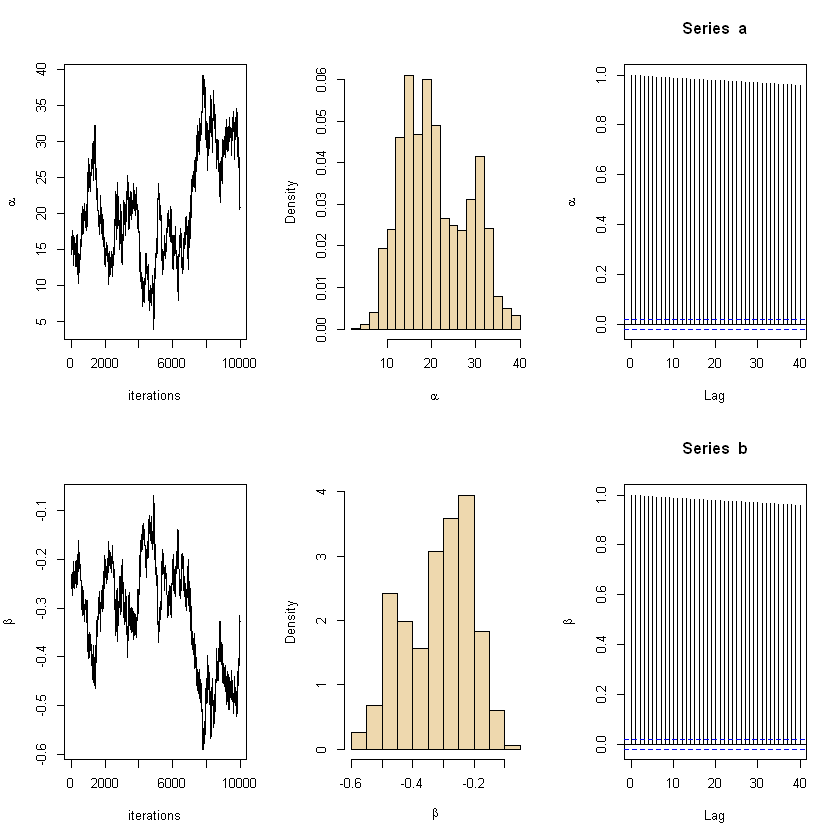

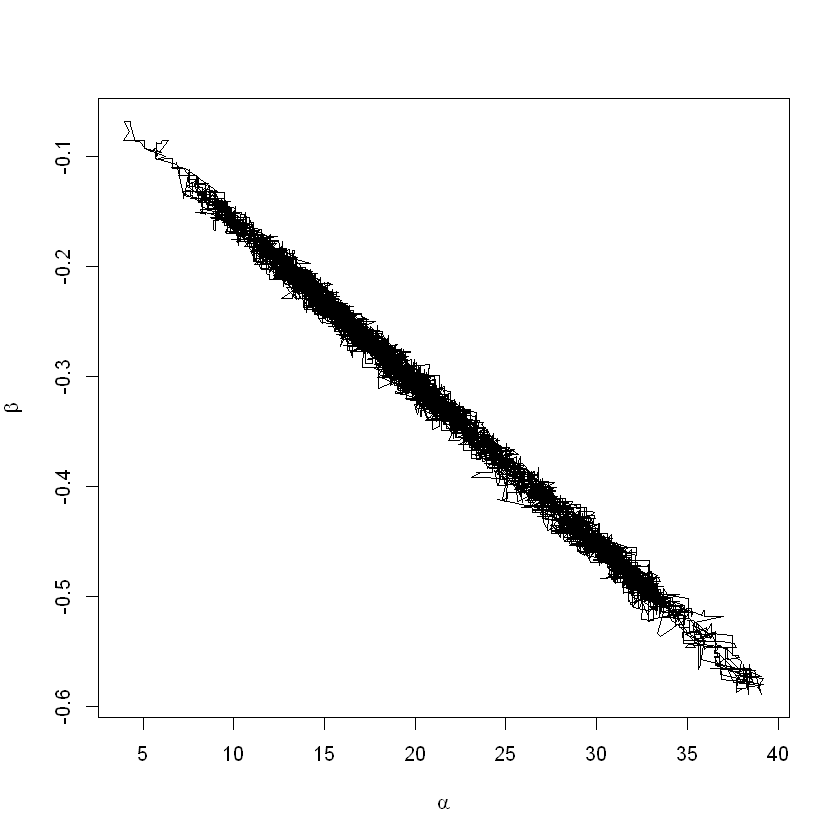

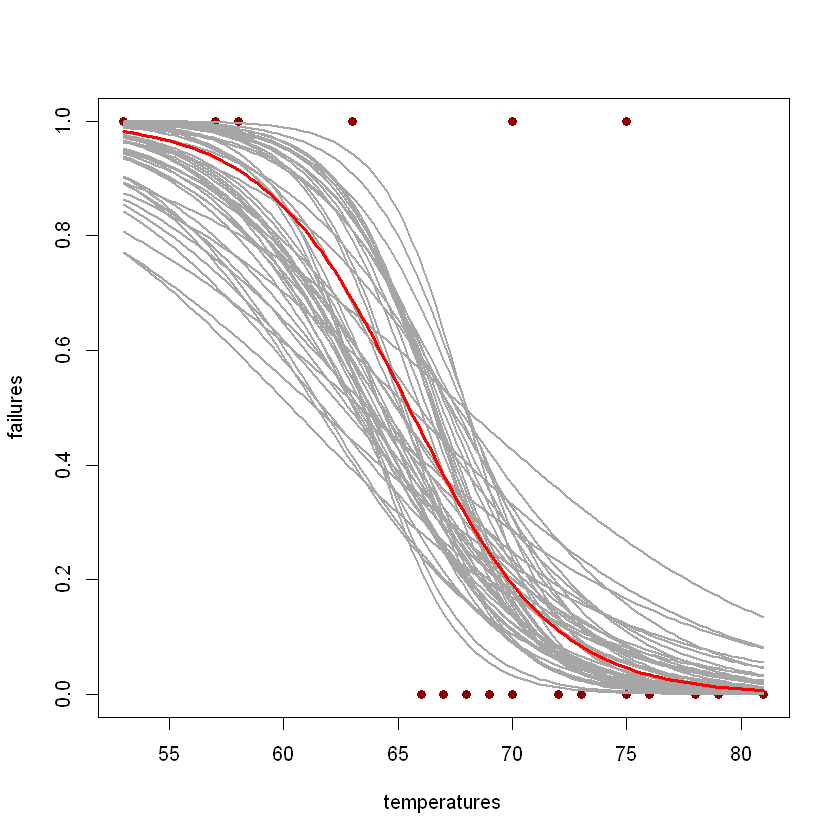

In [12]:
set.seed(1)
Nsim=10^4
x=challenger$temp
y=challenger$oring
sigmaa=5*10 ; sigmab=5*10/sd(x)
lpost=function(a,b){sum(y*(a+b*x)-log(1+exp(a+b*x)))+
                    dnorm(a,sd=sigmaa,log=TRUE)+dnorm(b,sd=sigmab,log=TRUE)}
# Initialize a and b to equal the MLEs
beta=as.vector(fit.logistic$coefficients)
a=b=rep(0,Nsim)
a[1]=beta[1]
b[1]=beta[2]
#As scale for the proposal densities consider the square root of the
# cov.unscaled from the ml fit to the logistic model
fit.logistic.summary<-summary(fit.logistic)
scala=sqrt(fit.logistic.summary$cov.unscaled[1,1])/10
scalb=sqrt(fit.logistic.summary$cov.unscaled[2,2])/10
for (t in 2:Nsim){
    propa=a[t-1]+sample(c(-1,1),1)*rexp(1)*scala
    if (log(runif(1))<lpost(propa,b[t-1])- lpost(a[t-1],b[t-1])) 
        a[t]=propa else
            a[t]=a[t-1]
        propb=b[t-1]+sample(c(-1,1),1)*rexp(1)*scalb
    if (log(runif(1))<lpost(a[t],propb)- lpost(a[t],b[t-1]))
        b[t]=propb
    else b[t]=b[t-1]
}



par(mfrow=c(2,3))
plot(a,type="l",xlab="iterations",ylab=expression(alpha))
hist(a,prob=TRUE,col="wheat2",xlab=expression(alpha),main="")
acf(a,ylab=expression(alpha))
plot(b,type="l",xlab="iterations",ylab=expression(beta))
hist(b,prob=TRUE,col="wheat2",xlab=expression(beta),main="")
acf(b,ylab=expression(beta))

par(mfcol=c(1,1))
plot(a,b,type="l",xlab=expression(alpha),ylab=expression(beta))

plot(challenger$temp,challenger$oring,pch=19,col="red4",xlab="temperatures",ylab="failures")
for (t in seq(1000,Nsim,le=50)) curve(1/(1+exp(-a[t]-b[t]*x)), add=TRUE,col="grey65",lwd=2)
curve(1/(1+exp(-mean(a)-mean(b)*x)),add=TRUE,col="red",lwd=2.5)
postal=rep(0,1000);i=1

In [13]:
print(length(unique(a))/Nsim)
print(length(unique(b))/Nsim)
print (c(mean(a), sd(a))); print (c(mean(b), sd(b)))
print(c(mean(1/(1+exp(-a-b*30))),sd(1/(1+exp(-a-b*30)))))

[1] 0.6104
[1] 0.6141
[1] 20.807518  7.358899
[1] -0.3177214  0.1082698
[1] 0.998901915 0.005897289


From the results above we get:

|<td colspan=2> <center> one-tenth scales <td colspan=2> <center>  original 
|---| :---:|:---:|:---: | :---:
||$\alpha$| $\beta$|$\alpha$| $\beta$|
|acceptance rates | 0.6104|0.6141|  0.1062 |0.1039 
|means |20.807518|-0.3177214|9.414120|-0.1502712
|standard deviations |7.358899|0.1082698|5.119201|0.0746917
|P(error) at 30 F<td colspan=2><center> 0.998901915 <td colspan=2> <center> 0.9311312
|standard error <td colspan=2><center> 0.005897289 <td colspan=2><center> 0.1273459

<br>
<br>
# Problem 2
<br>
<br>

## (a)

The joint posterior distribution simplifies to:

\begin{align}
&\Big[ \prod_{i=1}^{10}(\lambda_i t_i)^{x_i}e^{-\lambda_i t_i}\lambda_i^{a-1}e^{-\beta \lambda_i}\Big]\beta^{10 \alpha}\beta^{\gamma-1}e^{-\delta \beta} = \\
& \Big[ \prod_{i=1}^{10}\lambda_i^{x_i + \alpha-1} t_i^{x_i}e^{-\lambda_i (t_i + \beta)}\Big]\beta^{10 \alpha+\gamma-\delta \beta -1}= \\
& \Big[ \prod_{i=1}^{10}\lambda_i^{x_i + \alpha-1} t_i^{x_i}\Big]e^{-\delta \beta -\sum_{i=1}^{10}\lambda_i (t_i + \beta)}\beta^{10 \alpha+\gamma -1}
\end{align}

## (b)

The conditional distribution of $\lambda$ is defined as:
\begin{align}
\pi(\lambda_i \space | \space \beta, t_i, x_i) &= \frac{\pi(\lambda_i, \beta \space | \space t_i, x_i)}{\pi(\beta)} \\
&= \frac{\lambda_i^{x_i + \alpha-1} t_i^{x_i}e^{-\delta \beta -\lambda_i (t_i + \beta)}\beta^{10 \alpha+\gamma -1}}{}
&=\Gamma(x_i+\alpha, t_i+\beta)
\end{align}

The conditional distribution of $\beta$ will be defined as:
\begin{align}
\pi(\beta|\lambda_1,...,\lambda_{10}) = \Gamma(\gamma+10\alpha, \delta + \sum_{i=1}^{10}\lambda_i)
\end{align}

## (c)



In [14]:
xdata=c(5, 1, 5, 14, 3, 19, 1, 1, 4, 22)
Time=c(94.32, 15.72, 62.88, 125.76, 5.24, 31.44, 1.05, 1.05, 2.10, 10.48)
nx=length(xdata)
nsim=10^4;alpha = 1.8;gamma= 0.01;delta=1

beta=rgamma(1, shape= alpha, rate = delta)
l1=rgamma(nsim,shape=xdata[1]+alpha,rate=Time[1]+beta)


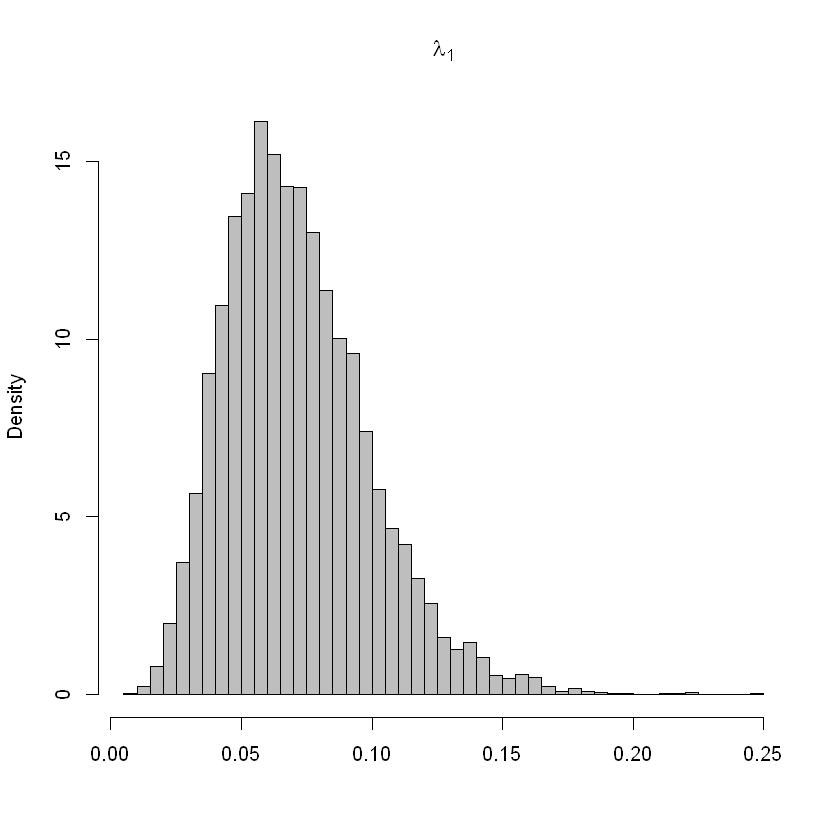

In [15]:
hist(l1,breaks=50,col="grey",xlab="",main=expression(lambda[1]), freq = F)

In [16]:
summary(l1)
mean(l1)
median(l1)
(var(l1))^0.5

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.008929 0.051490 0.067961 0.071503 0.087785 0.247411 

[1] 0.07150257

[1] 0.06796087

[1] 0.02768623

The maximum likelihood estimates of $\lambda_1,..., \lambda_{10}$ will be derived from the MLE for the parameter of the poisson random variable $X_i$. For a Poisson random variable $Y_i \sim Pois(\lambda^*)$ the MLE estimate is found as following. $$ \hat {\lambda^*}_{MLE} = \frac{\sum_{i=1}^n Y_i}{n}$$ Thus, for the data we have, we get: $$\hat {\lambda_i t}_{i_{MLE}} = X_i \\ \hat \lambda_{i_{MLE}} = \frac{X_i}{t_i}$$


In [17]:

xdata=c(5, 1, 5, 14, 3, 19, 1, 1, 4, 22)
Time=c(94.32, 15.72, 62.88, 125.76, 5.24, 31.44, 1.05, 1.05, 2.10, 10.48)

l_mle = xdata/Time
l_mle


[1] 0.05301103 0.06361323 0.07951654 0.11132316 0.57251908 0.60432570
 [7] 0.95238095 0.95238095 1.90476190 2.09923664

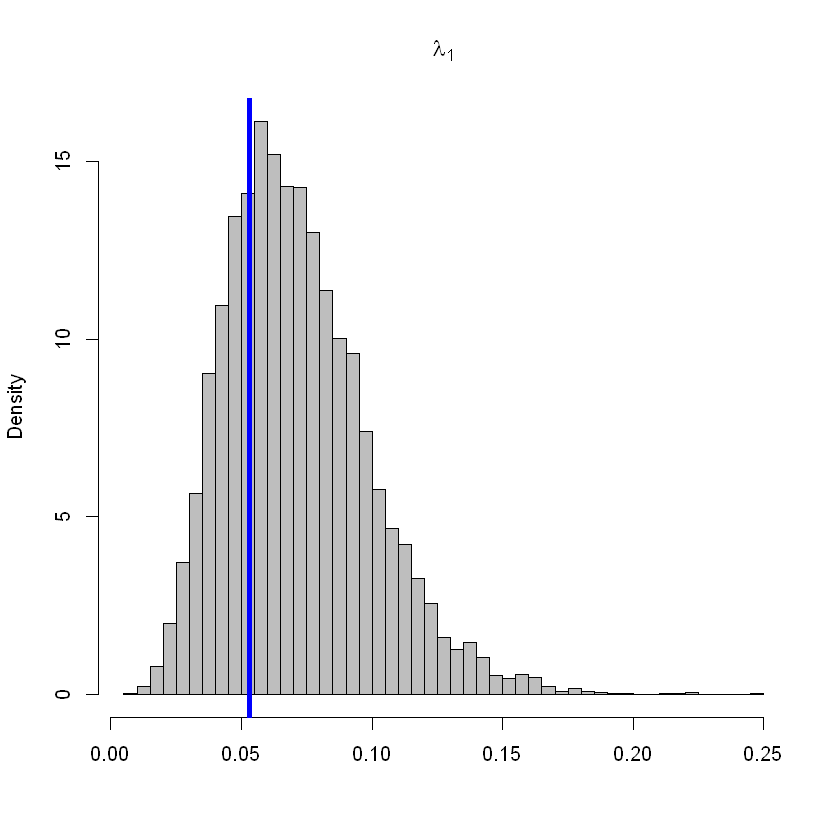

In [18]:
hist(freq = FALSE, l1,breaks=50,col="grey",xlab="",main=expression(lambda[1]))
abline(v=l_mle[1], lw=4, col = 'blue')

# (d)

In [19]:
nx=length(xdata)
nsim=10^4;alpha = 1.8;gamma= 0.01;delta=1
lambda=array(xdata*Time/sum(Time),dim=c(nsim,nx))
beta=rep(gamma*delta,nsim)
for (i in 2:nsim){
   for (j in 1:nx){
      lambda[i,j]=rgamma(1,shape=xdata[j]+alpha,rate=Time[j]+beta[i-1])
      }
   beta[i]=rgamma(1,shape=gamma+nx*alpha,rate=delta+sum(lambda[i,]))
   }


# (e)

The $95\%$ credible intervals for the parameters will be calculated as $I_{\lambda}=[\hat\lambda_{MLE}-1.96\sigma, \hat\lambda_{MLE}+1.96\sigma]$. Thus, for all of the parameters, we have:

In [43]:
l_int = matrix(nrow = 10, ncol = 2)
for (i in 1:length(l_mle)){
    sigma = sqrt(var(lambda[,i]))
    l_int[i,1] = l_mle[i]-1.96*sigma 
    l_int[i,2] = l_mle[i]+1.96*sigma 
}

In [45]:
l_int

-0.0055884076,0.1116105
-0.1181394103,0.2453659
-0.0031878778,0.1622210
0.0462782423,0.1763681
-0.0002468046,1.1452850
0.3382452347,0.8704062
-0.0732285818,1.9779905
-0.0823859472,1.9871479
0.7829220751,3.0266017
1.3384232977,2.8600500


It seems that pump 10 is one of the least reliable ones and pumps 1 and 2 are very reliable.

## (f)

Trying with a prior with parameters computed from the MLE estimates. For gamma distributions $X \sim \Gamma(k,\theta)$, we have:
$$ \hat\theta_{MLE} = \frac{1}{kN}\sum_{i=1}^N x_i \\
s = ln(\frac{1}{N} \sum_{i=1}^N x_i)-\frac{1}{N} \sum_{i=1}^N ln( x_i)\\
k \simeq \frac{3-s+\sqrt{(s-3)^2+24s}}{12s} $$

In [62]:
xdata=c(5, 1, 5, 14, 3, 19, 1, 1, 4, 22)
Time=c(94.32, 15.72, 62.88, 125.76, 5.24, 31.44, 1.05, 1.05, 2.10, 10.48)
nx=length(xdata)
nsim=10^4;alpha = 1.8;gamma= 0.01;delta=1

s = log(sum(xdata)/nx)-sum(log(xdata))/nx
alpha = (3-s+sqrt((s-3)^2+24*s))/(12*s)


beta=rgamma(1, shape= alpha, rate = delta)
l1=rgamma(nsim,shape=xdata[1]+alpha,rate=Time[1]+beta)
alpha

[1] 0.9911668

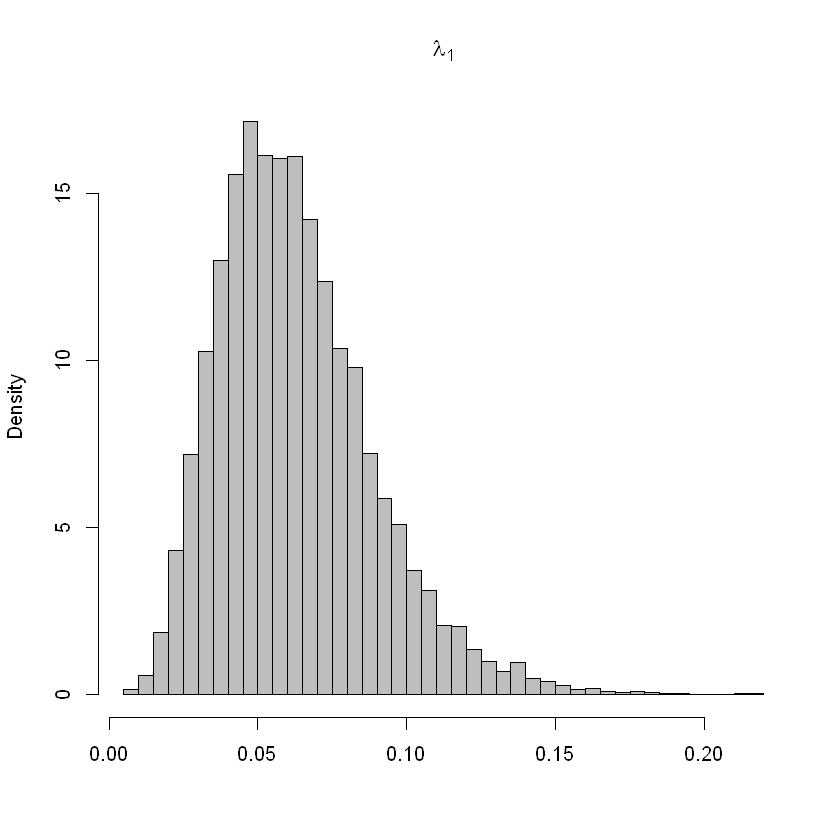

In [58]:
hist(l1,breaks=50,col="grey",xlab="",main=expression(lambda[1]), freq = F)

In [59]:
summary(l1)
mean(l1)
median(l1)
(var(l1))^0.5

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.008391 0.044136 0.059198 0.062665 0.077269 0.217807 

[1] 0.06266512

[1] 0.05919843

[1] 0.02566085

The maximum likelihood estimates of $\lambda_1,..., \lambda_{10}$ will be derived from the MLE for the parameter of the poisson random variable $X_i$. For a Poisson random variable $Y_i \sim Pois(\lambda^*)$ the MLE estimate is found as following. $$ \hat {\lambda^*}_{MLE} = \frac{\sum_{i=1}^n Y_i}{n}$$ Thus, for the data we have, we get: $$\hat {\lambda_i t}_{i_{MLE}} = X_i \\ \hat \lambda_{i_{MLE}} = \frac{X_i}{t_i}$$


In [60]:

xdata=c(5, 1, 5, 14, 3, 19, 1, 1, 4, 22)
Time=c(94.32, 15.72, 62.88, 125.76, 5.24, 31.44, 1.05, 1.05, 2.10, 10.48)

l_mle = xdata/Time
l_mle


[1] 0.05301103 0.06361323 0.07951654 0.11132316 0.57251908 0.60432570
 [7] 0.95238095 0.95238095 1.90476190 2.09923664

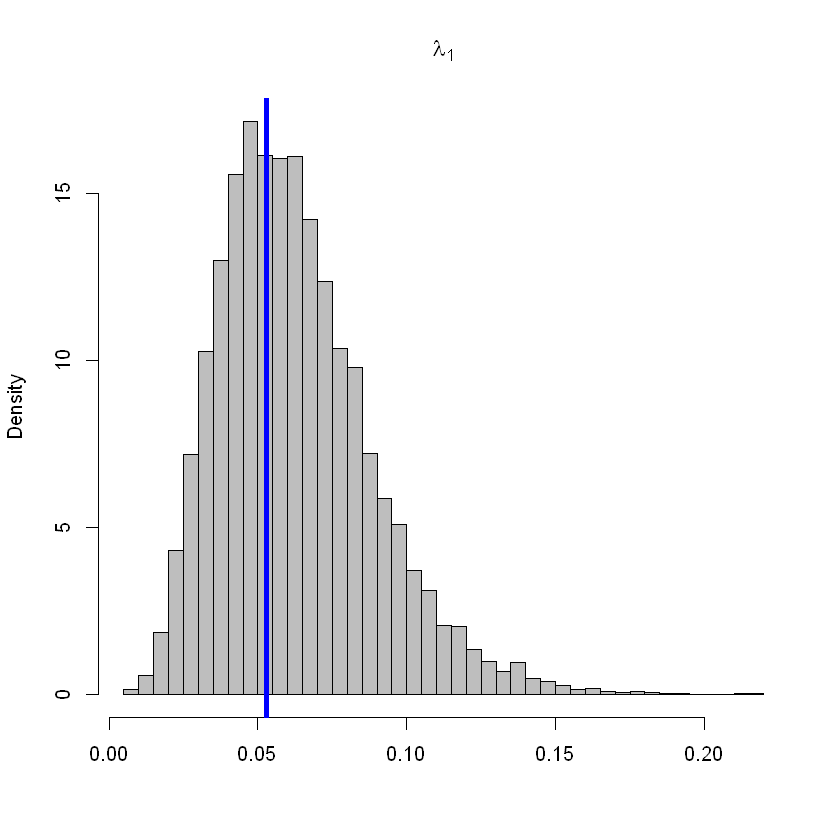

In [61]:
hist(freq = FALSE, l1,breaks=50,col="grey",xlab="",main=expression(lambda[1]))
abline(v=l_mle[1], lw=4, col = 'blue')

# (d)

In [63]:
nx=length(xdata)
nsim=10^4;alpha = 1.8;gamma= 0.01;delta=1
lambda=array(xdata*Time/sum(Time),dim=c(nsim,nx))
beta=rep(gamma*delta,nsim)
for (i in 2:nsim){
   for (j in 1:nx){
      lambda[i,j]=rgamma(1,shape=xdata[j]+alpha,rate=Time[j]+beta[i-1])
      }
   beta[i]=rgamma(1,shape=gamma+nx*alpha,rate=delta+sum(lambda[i,]))
   }



The $95\%$ credible intervals for the parameters will be calculated as $I_{\lambda}=[\hat\lambda_{MLE}-1.96\sigma, \hat\lambda_{MLE}+1.96\sigma]$. Thus, for all of the parameters, we have:

In [64]:
l_int = matrix(nrow = 10, ncol = 2)
for (i in 1:length(l_mle)){
    sigma = sqrt(var(lambda[,i]))
    l_int[i,1] = l_mle[i]-1.96*sigma 
    l_int[i,2] = l_mle[i]+1.96*sigma 
}

In [45]:
l_int

-0.0055884076,0.1116105
-0.1181394103,0.2453659
-0.0031878778,0.1622210
0.0462782423,0.1763681
-0.0002468046,1.1452850
0.3382452347,0.8704062
-0.0732285818,1.9779905
-0.0823859472,1.9871479
0.7829220751,3.0266017
1.3384232977,2.8600500
